Line-level text & document metadata extraction

In [1]:
!pip -q install pdfplumber pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.6 MB/s eta 0:00:00


In [8]:
import pdfplumber
from pypdf import PdfReader

print("pdfplumber:", pdfplumber.__version__)
print("pypdf imported successfully")

pdfplumber: 0.11.9
pypdf imported successfully


In [50]:
from google.colab import files
uploaded = files.upload()

Saving drylab.pdf to drylab.pdf


In [51]:
pdf_path = next(iter(uploaded.keys()))
pdf_path

'drylab.pdf'

In [52]:
with pdfplumber.open(pdf_path) as pdf:
    print("Pages:", len(pdf.pages))

Pages: 3


In [53]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    print("Page size:", page.width, page.height)

Page size: 595.2756 841.8898


In [203]:
# bbox = (x0, top, x1, bottom)
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    bbox = (0, 0, page.width, 220)

bbox

(0, 0, 595.2756, 220)

In [204]:
import pdfplumber
import pandas as pd

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    cropped = page.crop(bbox)

    chars = cropped.chars  # list of character-level objects with metadata

print("Total chars inside bbox:", len(chars))

# Show a few raw examples
chars[:5]

Total chars inside bbox: 44


[{'matrix': (1, 0, 0, 1, 56.6929, 707.7569),
  'fontname': 'MontserratThin_700wght',
  'adv': 66.08000000000001,
  'upright': True,
  'x0': 56.6929,
  'y0': 687.6768999999999,
  'x1': 122.77290000000002,
  'y1': 767.6768999999999,
  'width': 66.08000000000001,
  'height': 80.0,
  'size': 80.0,
  'mcid': None,
  'tag': None,
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'DeviceRGB',
  'text': 'D',
  'stroking_color': (0,),
  'non_stroking_color': (1.0, 0.6627, 0.2275),
  'top': 74.2129000000001,
  'bottom': 154.2129000000001,
  'doctop': 74.2129000000001},
 {'matrix': (1, 0, 0, 1, 122.77290000000002, 707.7569),
  'fontname': 'MontserratThin_700wght',
  'adv': 34.48,
  'upright': True,
  'x0': 122.77290000000002,
  'y0': 687.6768999999999,
  'x1': 157.2529,
  'y1': 767.6768999999999,
  'width': 34.47999999999999,
  'height': 80.0,
  'size': 80.0,
  'mcid': None,
  'tag': None,
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'DeviceRGB',
  'text': 'r',
  'stroking_color': (0

In [205]:
rows = []
for c in chars:
    rows.append({
        "text": c.get("text"),
        "fontname": c.get("fontname"),
        "size": c.get("size"),
        "x0": c.get("x0"),
        "top": c.get("top"),
        "x1": c.get("x1"),
        "bottom": c.get("bottom"),
    })

df = pd.DataFrame(rows)

# quick view
df.head(20)

,text,fontname,size,x0,top,x1,bottom
0,D,MontserratThin_700wght,80.0,56.6929,74.2129,122.7729,154.2129
1,r,MontserratThin_700wght,80.0,122.7729,74.2129,157.2529,154.2129
2,y,MontserratThin_700wght,80.0,157.2529,74.2129,205.0929,154.2129
3,l,MontserratThin_700wght,80.0,205.0929,74.2129,229.1729,154.2129
4,a,MontserratThin_700wght,80.0,229.1729,74.2129,278.5329,154.2129
5,b,MontserratThin_700wght,80.0,278.5329,74.2129,333.7329,154.2129
6,N,Montserrat-Thin,80.0,333.7329,74.2129,399.0129,154.2129
7,e,Montserrat-Thin,80.0,399.0129,74.2129,445.9729,154.2129
8,w,Montserrat-Thin,80.0,445.9729,74.2129,513.0129,154.2129
9,s,Montserrat-Thin,80.0,513.0129,74.2129,550.0529,154.2129


In [206]:
df.groupby(["fontname", "size"]).size().reset_index(name="count").sort_values("count", ascending=False).head(20)

,fontname,size,count
1,MontserratThin_300wght,13.0,34
2,MontserratThin_700wght,80.0,6
0,Montserrat-Thin,80.0,4


In [207]:
# Extract words from the cropped region
words = cropped.extract_words(
    keep_blank_chars=False,
    use_text_flow=True,
    extra_attrs=["fontname", "size"]
)

print("Total words inside bbox:", len(words))
words[:10]

Total words inside bbox: 9


[{'text': 'Drylab',
  'x0': 56.6929,
  'x1': 333.73290000000003,
  'top': 74.2129000000001,
  'doctop': 74.2129000000001,
  'bottom': 154.2129000000001,
  'upright': True,
  'height': 80.0,
  'width': 277.04,
  'direction': 'ltr',
  'fontname': 'MontserratThin_700wght',
  'size': 80.0},
 {'text': 'News',
  'x0': 333.7329,
  'x1': 550.0528999999999,
  'top': 74.2129000000001,
  'doctop': 74.2129000000001,
  'bottom': 154.2129000000001,
  'upright': True,
  'height': 80.0,
  'width': 216.31999999999994,
  'direction': 'ltr',
  'fontname': 'Montserrat-Thin',
  'size': 80.0},
 {'text': 'for',
  'x0': 332.7797,
  'x1': 350.2257,
  'top': 144.05990000000008,
  'doctop': 144.05990000000008,
  'bottom': 157.05990000000008,
  'upright': True,
  'height': 13.0,
  'width': 17.446000000000026,
  'direction': 'ltr',
  'fontname': 'MontserratThin_300wght',
  'size': 13.0},
 {'text': 'investors',
  'x0': 353.56669999999997,
  'x1': 411.11769999999996,
  'top': 144.05990000000008,
  'doctop': 144.0599

In [208]:
import pandas as pd

wdf = pd.DataFrame(words)
wdf

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,fontname,size
0,Drylab,56.6929,333.7329,74.2129,74.2129,154.2129,True,80.0,277.040,ltr,MontserratThin_700wght,80.0
1,News,333.7329,550.0529,74.2129,74.2129,154.2129,True,80.0,216.320,ltr,Montserrat-Thin,80.0
2,for,332.7797,350.2257,144.0599,144.0599,157.0599,True,13.0,17.446,ltr,MontserratThin_300wght,13.0
3,investors,353.5667,411.1177,144.0599,144.0599,157.0599,True,13.0,57.551,ltr,MontserratThin_300wght,13.0
4,&,414.4587,422.9737,144.0599,144.0599,157.0599,True,13.0,8.515,ltr,MontserratThin_300wght,13.0
5,friends,426.3147,470.5927,144.0599,144.0599,157.0599,True,13.0,44.278,ltr,MontserratThin_300wght,13.0
6,·,473.9337,477.0537,144.0599,144.0599,157.0599,True,13.0,3.120,ltr,MontserratThin_300wght,13.0
7,May,480.3947,507.2657,144.0599,144.0599,157.0599,True,13.0,26.871,ltr,MontserratThin_300wght,13.0
8,2017,510.6067,538.5827,144.0599,144.0599,157.0599,True,13.0,27.976,ltr,MontserratThin_300wght,13.0


In [209]:
# Round top to cluster words into the same line
wdf["line_id"] = wdf["top"].round(0)

lines = (
    wdf.sort_values(["line_id", "x0"])
      .groupby("line_id")
      .agg({
          "text": lambda x: " ".join(x),
          "fontname": lambda x: x.value_counts().index[0],
          "size": lambda x: x.value_counts().index[0],
          "x0": "min",
          "top": "min",
          "x1": "max",
          "bottom": "max",
      })
      .reset_index()
      .sort_values("top")
)

lines

,line_id,text,fontname,size,x0,top,x1,bottom
0,74.0,Drylab News,MontserratThin_700wght,80.0,56.6929,74.2129,550.0529,154.2129
1,144.0,for investors & friends · May 2017,MontserratThin_300wght,13.0,332.7797,144.0599,538.5827,157.0599


In [210]:
def clamp_bbox_to_page(bbox, page):
    """
    Ensures bbox is fully inside the page bounds.
    bbox: (x0, top, x1, bottom)
    """
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    # Ensure proper ordering
    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)

def bbox_overlap(a, b):
    # a, b are (x0, top, x1, bottom)
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0

def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    """
    Extract line-level metadata from text inside a bounding box.

    bbox format: (x0, top, x1, bottom) in pdfplumber coordinates
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {
                "page_number": page_number,
                "bbox": bbox,
                "lines": [],
                "message": "No text found inside bbox"
            }

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: x.value_counts().index[0],
                  "size": lambda x: x.value_counts().index[0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }

In [211]:
result = extract_bbox_text_metadata(pdf_path, page_number=0, bbox=bbox)
result

{'page_number': 0,
 'bbox': (0, 0, 595.2756, 220),
 'lines': [{'text': 'Drylab News',
   'fontname': 'MontserratThin_700wght',
   'size': 80.0,
   'x0': 56.6929,
   'top': 74.2129000000001,
   'x1': 550.0528999999999,
   'bottom': 154.2129000000001},
  {'text': 'for investors & friends · May 2017',
   'fontname': 'MontserratThin_300wght',
   'size': 13.0,
   'x0': 332.7797,
   'top': 144.05990000000008,
   'x1': 538.5827,
   'bottom': 157.05990000000008}]}

In [212]:
import json

print(json.dumps(result, indent=2))

{
  "page_number": 0,
  "bbox": [
    0,
    0,
    595.2756,
    220
  ],
  "lines": [
    {
      "text": "Drylab News",
      "fontname": "MontserratThin_700wght",
      "size": 80.0,
      "x0": 56.6929,
      "top": 74.2129000000001,
      "x1": 550.0528999999999,
      "bottom": 154.2129000000001
    },
    {
      "text": "for investors & friends \u00b7 May 2017",
      "fontname": "MontserratThin_300wght",
      "size": 13.0,
      "x0": 332.7797,
      "top": 144.05990000000008,
      "x1": 538.5827,
      "bottom": 157.05990000000008
    }
  ]
}


In [213]:
out_path = "bbox_metadata_page0.json"

with open(out_path, "w") as f:
    json.dump(result, f, indent=2)

out_path

'bbox_metadata_page0.json'

In [214]:
from pypdf import PdfReader

def extract_pdf_document_metadata(pdf_path):
    reader = PdfReader(pdf_path)
    meta = reader.metadata  # DocumentInformation

    # Convert to normal dict (and stringify values safely)
    out = {}
    if meta:
        for k, v in meta.items():
            out[str(k)] = str(v)
    return out

doc_meta = extract_pdf_document_metadata(pdf_path)
doc_meta

{'/Producer': 'Prince 16 (www.princexml.com)'}

In [215]:
combined = {
    "pdf_path": pdf_path,
    "document_metadata": doc_meta,
    "bbox_extraction": result
}

import json
print(json.dumps(combined, indent=2))

{
  "pdf_path": "drylab.pdf",
  "document_metadata": {
    "/Producer": "Prince 16 (www.princexml.com)"
  },
  "bbox_extraction": {
    "page_number": 0,
    "bbox": [
      0,
      0,
      595.2756,
      220
    ],
    "lines": [
      {
        "text": "Drylab News",
        "fontname": "MontserratThin_700wght",
        "size": 80.0,
        "x0": 56.6929,
        "top": 74.2129000000001,
        "x1": 550.0528999999999,
        "bottom": 154.2129000000001
      },
      {
        "text": "for investors & friends \u00b7 May 2017",
        "fontname": "MontserratThin_300wght",
        "size": 13.0,
        "x0": 332.7797,
        "top": 144.05990000000008,
        "x1": 538.5827,
        "bottom": 157.05990000000008
      }
    ]
  }
}


In [216]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    W, H = page.width, page.height

bboxes = [
    (0, 0, W, 220),        # header region (you tested this)
    (0, H-120, W, H)       # footer strip (last 120px)
]

page_number = 0

multi_results = []
for i, bb in enumerate(bboxes):
    r = extract_bbox_text_metadata(pdf_path, page_number=page_number, bbox=bb)
    r["bbox_id"] = i
    multi_results.append(r)

multi_results

[{'page_number': 0,
  'bbox': (0, 0, 595.2756, 220),
  'lines': [{'text': 'Drylab News',
    'fontname': 'MontserratThin_700wght',
    'size': 80.0,
    'x0': 56.6929,
    'top': 74.2129000000001,
    'x1': 550.0528999999999,
    'bottom': 154.2129000000001},
   {'text': 'for investors & friends · May 2017',
    'fontname': 'MontserratThin_300wght',
    'size': 13.0,
    'x0': 332.7797,
    'top': 144.05990000000008,
    'x1': 538.5827,
    'bottom': 157.05990000000008}],
  'bbox_id': 0},
 {'page_number': 0,
  'bbox': (0, 721.8898, 595.2756, 841.8898),
  'lines': [{'text': 'meetings meetings Google · IBM · Innovation Norway (NYC) · Innovation Norway (SF) · International',
    'fontname': 'PdbpbbLato-Regular',
    'size': 11.5,
    'x0': 56.6929,
    'top': 721.8898,
    'x1': 538.5827075499999,
    'bottom': 727.9469},
   {'text': 'NY NY · · SF SF',
    'fontname': 'PdbpbbLato-Regular',
    'size': 14.0,
    'x0': 62.7059,
    'top': 727.0969,
    'x1': 106.94590000000001,
    'bottom'

In [217]:
multi_output = {
    "pdf_path": pdf_path,
    "page_number": page_number,
    "bboxes": bboxes,
    "results": multi_results
}

import json
print(json.dumps(multi_output, indent=2))

{
  "pdf_path": "drylab.pdf",
  "page_number": 0,
  "bboxes": [
    [
      0,
      0,
      595.2756,
      220
    ],
    [
      0,
      721.8898,
      595.2756,
      841.8898
    ]
  ],
  "results": [
    {
      "page_number": 0,
      "bbox": [
        0,
        0,
        595.2756,
        220
      ],
      "lines": [
        {
          "text": "Drylab News",
          "fontname": "MontserratThin_700wght",
          "size": 80.0,
          "x0": 56.6929,
          "top": 74.2129000000001,
          "x1": 550.0528999999999,
          "bottom": 154.2129000000001
        },
        {
          "text": "for investors & friends \u00b7 May 2017",
          "fontname": "MontserratThin_300wght",
          "size": 13.0,
          "x0": 332.7797,
          "top": 144.05990000000008,
          "x1": 538.5827,
          "bottom": 157.05990000000008
        }
      ],
      "bbox_id": 0
    },
    {
      "page_number": 0,
      "bbox": [
        0,
        721.8898,
        595.2756,

Extract image element metadata & table structure


In [218]:
def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    """
    Returns embedded images that intersect bbox.
    bbox: (x0, top, x1, bottom)
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "image_bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                    "name": img.get("name"),
                    "srcsize": img.get("srcsize"),
                })

        return {
            "page_number": page_number,
            "bbox": bbox,
            "image_count": len(results),
            "images": results
        }

In [219]:
def save_images_in_bbox(pdf_path, page_number, bbox, out_prefix="bbox_image"):
    saved_files = []

    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

            if bbox_overlap(bbox, img_bbox):
                cropped = page.crop(img_bbox)
                out_name = f"{out_prefix}_page{page_number}_img{i}.png"
                cropped.to_image(resolution=200).save(out_name)
                saved_files.append(out_name)

    return saved_files

In [220]:
def extract_bbox_table_signal(pdf_path, page_number, bbox):
    """
    Returns lightweight signals to guess if bbox contains a table/grid.
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines_count": len(cropped.lines),
            "rects_count": len(cropped.rects),
            "curves_count": len(cropped.curves),
            "likely_table": (len(cropped.lines) + len(cropped.rects)) > 15
        }

In [221]:
def extract_bbox_metadata(pdf_path, page_number, bbox):
    text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)
    image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)
    table_part = extract_bbox_table_signal(pdf_path, page_number, bbox)

    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": text_part.get("bbox", bbox),  # clamped bbox
        "text": text_part.get("lines", []),
        "text_line_count": len(text_part.get("lines", [])),
        "images": image_part.get("images", []),
        "image_count": image_part.get("image_count", 0),
        "table_signal": table_part
    }

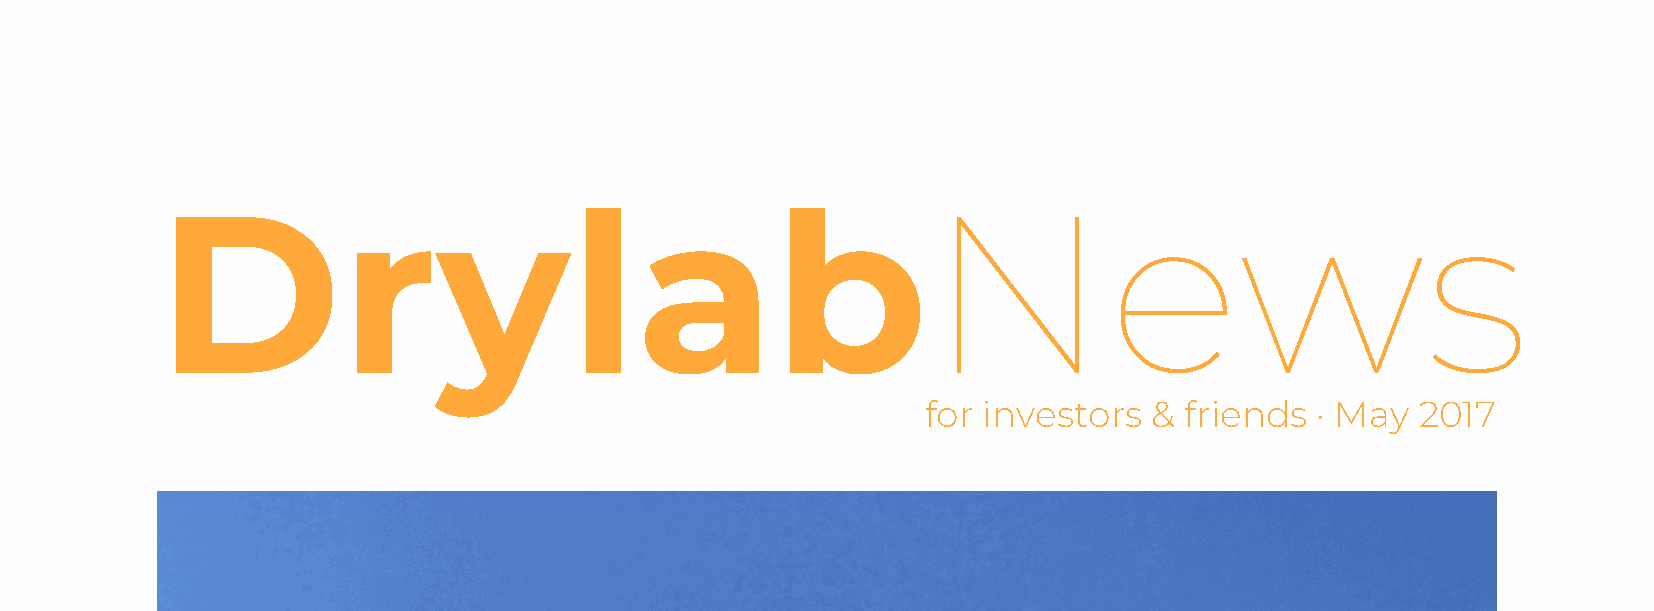

In [222]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]
    bbox2 = clamp_bbox_to_page(bbox, page)
    display(page.crop(bbox2).to_image(resolution=200))

In [229]:
out_path = "final_bbox_metadata.json"
with open(out_path, "w") as f:
    json.dump(result, f, indent=2)

from google.colab import files
files.download(out_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [223]:
import json

# Example: pretend these coordinates came from UI/user
page_number = 0

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]
    bbox = (0, 210, page.width, 430)  # x0, top, x1, bottom

result = extract_bbox_metadata(pdf_path, page_number=page_number, bbox=bbox)
print(json.dumps(result, indent=2))

{
  "pdf_path": "drylab.pdf",
  "page_number": 0,
  "bbox": [
    0,
    210,
    595.2756,
    430
  ],
  "text": [],
  "text_line_count": 0,
  "images": [
    {
      "image_id": 0,
      "image_bbox": [
        56.6929,
        177.05990000000008,
        538.5826999999999,
        426.3613
      ],
      "width": 481.8897999999999,
      "height": 249.30139999999994,
      "name": "I1",
      "srcsize": [
        2768,
        1432
      ]
    }
  ],
  "image_count": 1,
  "table_signal": {
    "page_number": 0,
    "bbox": [
      0,
      210,
      595.2756,
      430
    ],
    "lines_count": 0,
    "rects_count": 0,
    "curves_count": 0,
    "likely_table": false
  }
}


CLI Creation

In [230]:
%%writefile extract_bbox_metadata.py
import argparse
import json
from collections import Counter

import pdfplumber
import pandas as pd


def clamp_bbox_to_page(bbox, page):
    """
    Ensures bbox is fully inside the page bounds.
    bbox: (x0, top, x1, bottom)
    """
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)


def bbox_overlap(a, b):
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0


def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    """
    Extract line-level metadata from text inside a bounding box.
    bbox format: (x0, top, x1, bottom)
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {
                "page_number": page_number,
                "bbox": bbox,
                "lines": [],
                "message": "No text found inside bbox"
            }

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: Counter(x).most_common(1)[0][0],
                  "size": lambda x: Counter(x).most_common(1)[0][0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }


def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    """
    Returns embedded images that intersect bbox.
    bbox format: (x0, top, x1, bottom)
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "image_bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                    "name": img.get("name"),
                    "srcsize": img.get("srcsize"),
                })

        return {
            "page_number": page_number,
            "bbox": bbox,
            "image_count": len(results),
            "images": results
        }


def extract_bbox_table_signal(pdf_path, page_number, bbox):
    """
    Returns lightweight signals to guess if bbox contains a table/grid.
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines_count": len(cropped.lines),
            "rects_count": len(cropped.rects),
            "curves_count": len(cropped.curves),
            "likely_table": (len(cropped.lines) + len(cropped.rects)) > 15
        }


def extract_bbox_metadata(pdf_path, page_number, bbox):
    text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)
    image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)
    table_part = extract_bbox_table_signal(pdf_path, page_number, bbox)

    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": text_part.get("bbox", bbox),
        "text": text_part.get("lines", []),
        "text_line_count": len(text_part.get("lines", [])),
        "images": image_part.get("images", []),
        "image_count": image_part.get("image_count", 0),
        "table_signal": table_part
    }


def main():
    parser = argparse.ArgumentParser(
        description="Extract metadata from a PDF region (bbox) without PyMuPDF."
    )

    parser.add_argument("--pdf", required=True, help="Path to PDF file")
    parser.add_argument("--page", type=int, required=True, help="Page number (0-indexed)")
    parser.add_argument(
        "--bbox",
        nargs=4,
        type=float,
        required=True,
        metavar=("x0", "top", "x1", "bottom"),
        help="Bounding box coordinates (pdfplumber coords)"
    )
    parser.add_argument("--out", default=None, help="Output JSON file path (optional).")

    args = parser.parse_args()

    bbox = tuple(args.bbox)
    result = extract_bbox_metadata(args.pdf, args.page, bbox)

    if args.out:
        with open(args.out, "w") as f:
            json.dump(result, f, indent=2)
        print(f"Saved output to: {args.out}")
    else:
        print(json.dumps(result, indent=2))


if __name__ == "__main__":
    main()

Overwriting extract_bbox_metadata.py


In [231]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    W, H = page.width, page.height

!python extract_bbox_metadata.py --pdf "{pdf_path}" --page 0 --bbox 0 120 {W} 560

{
  "pdf_path": "drylab.pdf",
  "page_number": 0,
  "bbox": [
    0,
    120.0,
    595.2756,
    560.0
  ],
  "text": [
    {
      "text": "Drylab News",
      "fontname": "MontserratThin_700wght",
      "size": 80.0,
      "x0": 56.6929,
      "top": 120.0,
      "x1": 550.0528999999999,
      "bottom": 154.2129000000001
    },
    {
      "text": "for investors & friends \u00b7 May 2017",
      "fontname": "MontserratThin_300wght",
      "size": 13.0,
      "x0": 332.7797,
      "top": 144.05990000000008,
      "x1": 538.5827,
      "bottom": 157.05990000000008
    },
    {
      "text": "Welcome to our first newsletter of 2017! It's the 2.05 MNOK loan from Innovation",
      "fontname": "PdbpbbLato-Regular",
      "size": 12.0,
      "x0": 56.6929,
      "top": 441.9613,
      "x1": 498.5058,
      "bottom": 453.9613
    },
    {
      "text": "been a while since the last one, and a lot has Norway. Including the development",
      "fontname": "PdbpbbLato-Regular",
      "size": 1